<div style="text-align: center;">
    <h1>Seminario Final de Estadística</h1>
</div>


## Integrantes

- Jabel Resendiz Aguirre              - C312
- Arianne Camila Palancar Ochando     - C311
- Noel Pérez Calvo                    - C311

## Introducción

La Fórmula 1 (F1) es la categoría más alta del automovilismo deportivo, donde los mejores pilotos y equipos compiten en carreras de alta velocidad alrededor del mundo. Cada temporada, los equipos participan en una serie de carreras conocidas como Grandes Premios, que se llevan a cabo en circuitos de carreras en diferentes países.

El objetivo de este proyecto es analizar y modelar diversos aspectos de las carreras de Fórmula 1 utilizando un conjunto de datos simulado. Este dataset incluye información detallada sobre los conductores, equipos, circuitos, tiempos de reacción, tiempos de pit stop, posiciones finales, velocidades máximas, y número de adelantamientos, entre otros.

### Objetivos : 
1. `Análisis Descriptivo`: Realizar un análisis descriptivo de las variables para entender la distribución y características de los datos.

2. `Pruebas de Hipótesis`: Realizar pruebas de hipótesis para evaluar suposiciones sobre los datos, como la distribución del tiempo de reacción y el número de adelantamientos.

3. `Visualización de Datos`: Crear visualizaciones que ayuden a comunicar los hallazgos de manera efectiva, como gráficos de barras, histogramas y diagramas de dispersión.

El dataset contiene las siguientes variables:

- `Fecha de la carrera`: La fecha en que se llevó a cabo la carrera.
- `Conductor`: El nombre del conductor que participó en la carrera.
- `Edad del conductor`: La edad del conductor en el momento de la carrera.
- `Equipo`: El equipo al que pertenece el conductor.
- `Circuito`: El nombre del circuito donde se realizó la carrera.
- `Tiempo de pit stop`: El tiempo que el conductor pasó en los pits, medido en segundos.
- `Tiempo de reacción`: El tiempo de reacción del conductor al inicio de la carrera, medido en segundos.
- `Posición final`: La posición en la que el conductor terminó la carrera.
- `DNF (Did Not Finish)`: Indicador de si el conductor terminó la carrera (0) o no (1).
- `Puntos`: Los puntos obtenidos por el conductor en la carrera, basados en su posición final.
- `Velocidad máxima`: La velocidad máxima alcanzada por el conductor durante la carrera, medida en km/h.
- `Número de adelantamientos`: El número de adelantamientos realizados por el conductor durante la carrera.

Se espera que este análisis proporcione una comprensión más profunda de los factores que influyen en el rendimiento de los conductores en las carreras de Fórmula 1.



## Importando módulos

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
import matplotlib.pyplot as plt
import seaborn as sns

## Cargando datos

In [5]:
f1 = pd.read_csv('formula1_race_data.csv')

## Análisis exploratorio de los datos

### Descripción básica de los datos

In [6]:
f1.head() # verficar que se han cargado correctamente los datos

,Date,Driver,Age,Team,Circuit,PitStopTime,ReactionTime,FinalPosition,DNF,Points,MaxSpeed,Overtakes
0,2016-09-10,Perez,35,Williams,Melbourne,2.651,0.054,9,0,17,330.6,10
1,2023-02-16,Alonso,26,Alpine,Silverstone,2.550,0.470,6,0,20,314.4,10
2,2010-01-12,Ricciardo,31,Williams,Melbourne,3.187,0.186,12,0,0,330.4,5
3,2022-12-05,Ricciardo,26,Williams,Spa,3.358,0.531,12,0,0,303.2,2
4,2018-07-18,Bottas,26,Ferrari,Montreal,3.180,0.005,6,0,20,330.9,8


In [7]:
f1.info() #Se proporciona información útil sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           500 non-null    object 
 1   Driver         500 non-null    object 
 2   Age            500 non-null    int64  
 3   Team           500 non-null    object 
 4   Circuit        500 non-null    object 
 5   PitStopTime    500 non-null    float64
 6   ReactionTime   500 non-null    float64
 7   FinalPosition  500 non-null    int64  
 8   DNF            500 non-null    int64  
 9   Points         500 non-null    int64  
 10  MaxSpeed       500 non-null    float64
 11  Overtakes      500 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 47.0+ KB


In [8]:
f1.describe() #generar estadísticas descriptiva del DataFrame

,Age,PitStopTime,ReactionTime,FinalPosition,DNF,Points,MaxSpeed,Overtakes
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000
mean,27.640000,2.995430,0.198526,10.452000,0.16200,8.86200,329.979800,5.290000
std,5.081934,0.489169,0.192289,5.737031,0.36882,10.37585,9.875064,2.394445
min,12.000000,1.529000,0.000000,1.000000,0.00000,0.00000,299.100000,0.000000
25%,24.000000,2.646750,0.065000,6.000000,0.00000,0.00000,323.300000,4.000000
50%,28.000000,3.001000,0.139000,10.000000,0.00000,0.00000,329.400000,5.000000
75%,31.000000,3.330000,0.275500,16.000000,0.00000,20.00000,336.825000,7.000000
max,43.000000,4.385000,1.917000,20.000000,1.00000,25.00000,355.300000,14.000000


### DNF (Did Not Finish)

“Did Not Finish” (DNF) es un término utilizado para indicar que un competidor no completó la carrera. Esto puede ocurrir por diversas razones, como fallos mecánicos, accidentes, problemas de salud, o cualquier otra circunstancia que impida al competidor llegar a la meta1. Hagamos un análisis de la variable.

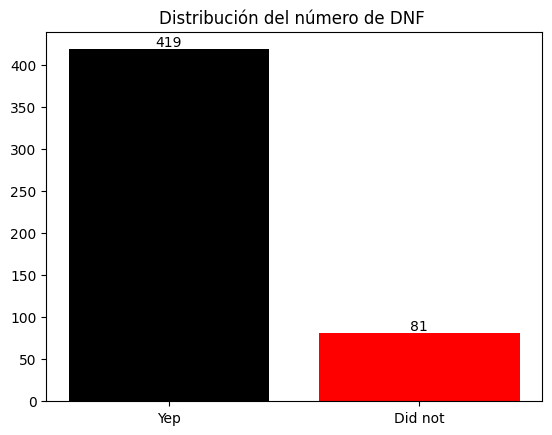

In [22]:
#Contarla cantidad de veces que se terminó una carrera
gender_counts = heart["DNF"].value_counts()
gender_counts

# Crear un gráfico de barras
plt.bar(gender_counts.index, gender_counts.values, color=['black', 'red'])
plt.xticks([0, 1], ['Yep', 'Did not'])
plt.title('Distribución del número de DNF ')

for index,value in enumerate(gender_counts.values):
        plt.text(index,value,str(value),ha='center', va='bottom')
plt.show()


Consideremos una variable de Bernoulli que nos manifiesta si un corredor finaliza la carrera, con lo cual tendremos una proporción muestral.

In [23]:
p_estimator = gender_counts[0]/ gender_counts.sum()
p_estimator

0.838

In [24]:
variance_estimator = mean_estimator*(1-mean_estimator)/gender_counts.sum()
variance_estimator

0.000271512

Construyamos un intervalo de confianza del 95 % para la proporción antes calculada.

Recordemos que el intervalo de confianza para una proporción se calcula
$$P(A) \in [ \hat{p} - \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}Z_{1 - \frac{\alpha}{2}} ; \hat{p} + \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}Z_{1 - \frac{\alpha}{2}}]$$

In [25]:
alpha = 0.05
n = gender_counts.sum()
Z = norm.ppf( 1-alpha/2 )
sq = np.sqrt(variance_estimator)
lower_bound = mean_estimator - sq*Z
upper_bound = mean_estimator + sq*Z

print("Intervalo : [ ",lower_bound,"," , upper_bound, "]")


Intervalo : [  0.8057044559215314 , 0.8702955440784685 ]


En general, la tasa de finalización de carreras ha mejorado significativamente a lo largo de los años debido a los avances en la tecnología y la fiabilidad de los monoplazas.

[Por ejemplo, en la temporada 2021, la tasa de finalización de carreras fue bastante alta, con un promedio de alrededor del 85-90% de los coches que comenzaron una carrera logrando terminarla](https://www.tudn.com/formula-1). Veamos si nuestro valor de proporción se puede considerar menor al dado.

In [27]:
#H0: p >= 0.85
#H1: p < 0.85

alpha = 0.05
p0= 0.85
n = gender_counts.sum()
Z = norm.ppf( 1-alpha )
Z_hat = (p_estimator - p0)*np.sqrt(n/(p0*(1-p0)))

print(f"Valor Z_hat: {Z_hat}")

if Z_hat < -Z:
    print("Rechazamos la hipótesis nula. La proporción muestral es significativamente menor que la proporción poblacional.")

else:
     print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción muestral es menor que la proporción poblacional.")

Valor Z_hat: -0.7514691493021801
No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción muestral es menor que la proporción poblacional.


No hay suficiente evidencia para concluir que la proporción de finalización de carreras es significativamente menor que 0.85.

### 

La presión arterial es una medida crucial de la salud cardiovascular, ya que indica la fuerza que ejerce la sangre contra las paredes de los vasso sanguíneos. Analicemos ahora el comportamiento de la presión arterial en el estudio.

Grafiquemos los valores para representar visualmente la distribución de sexo en el conjunto de datos.

Text(0.5, 1.0, 'Distribución de Presión Arterial')

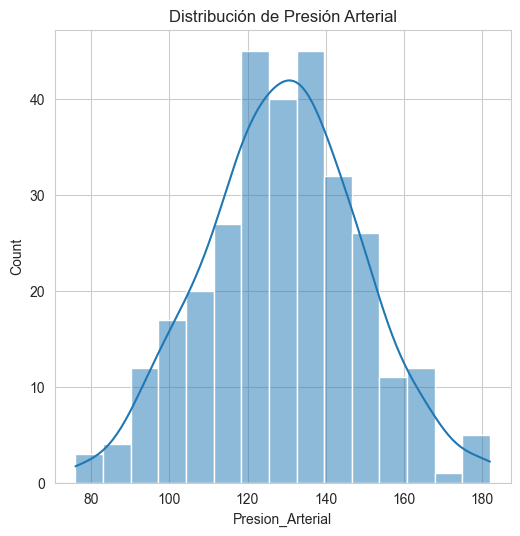

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 3)
sns.histplot(heart['Presion_Arterial'], kde=True)
plt.title('Distribución de Presión Arterial')


Como se puede visualizar en el histograma, los datos parecen seguir una distribución normal. Para comprobar esta observación, realizaremos un análisis de estadística inferencial. En particular, calcularemos los estimadores de la media y la varianza para validar la normalidad de los datos.

$\bar{X} = \frac{\sum{Xi}}{n}$ 

$s^2 = \frac{\sum{(Xi-\bar{X})^2}}{n-1}$

In [56]:
mean_blood_preasure = np.mean(heart["Presion_Arterial"])

varianza_blood_preasure = np.var(heart["Presion_Arterial"])

varianza_blood_preasure

389.3912888888889